# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idata model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

In [2]:
import pandas as pd
import numpy as np

## 2. Load the dataset [1 point]

In [10]:
file="financial_news_headlines_sentiment.csv"
data=pd.read_csv(file,encoding='ISO-8859-1',header=None)
data.columns = ["status", "text"]

## 3. Explore the dataset [10 points]

In [11]:
data.head()

,status,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [12]:
data.info


<bound method DataFrame.info of         status                                               text
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]>

In [13]:
data["status"].value_counts()

neutral     2879
positive    1363
negative     604
Name: status, dtype: int64

## 4. Clean the data [5 points]

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
data["status_n"] = le.fit_transform(data["status"])
data

,status,text,status_n
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0
4844,negative,Net sales of the Paper segment decreased to EU...,0


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

## 6. BoW model [15 points]

In [27]:
import nltk
import re

In [28]:
text = data.text.tolist()

In [29]:
for i in range(len(text)):
    text [i] = text [i].lower()
    text [i] = re.sub(r'\W',' ',text [i])
    text [i] = re.sub(r'\s+',' ',text [i])

In [30]:
wordfreq = {}
for sentence in text:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [31]:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [32]:
sentence_vectors = []
for sentence in text:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [35]:
sentence_vectors = np.asarray(sentence_vectors)

In [36]:
BoW=pd.DataFrame(sentence_vectors, columns=most_freq)

In [37]:
BoW

,the,of,in,and,to,a,for,s,eur,is,...,news,system,people,growth,line,now,billion,acquisition,ltd,report
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4844,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Tf-idf model [15 points]

In [38]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in text:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(text)/(1 + doc_containing_word))

In [39]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in text:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector

In [40]:
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

In [41]:
tf_idf_model = np.asarray(tfidf_values)

In [42]:
tf_idf_model = np.transpose(tf_idf_model)

In [43]:
tfidf = pd.DataFrame(tf_idf_model, columns=most_freq)

In [44]:
tfidf

,the,of,in,and,to,a,for,s,eur,is,...,news,system,people,growth,line,now,billion,acquisition,ltd,report
0,0.030889,0.000000,0.000000,0.000000,0.118989,0.000000,0.000000,0.000000,0.000000,0.154472,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011326,0.024885,0.078652,0.030004,0.058172,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.041185,0.045245,0.000000,0.000000,0.026442,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.053091,0.023330,0.024579,0.056258,0.027268,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027550,0.060531,0.021257,0.000000,0.023583,0.032760,0.042626,0.042924,0.000000,0.000000,...,0.0,0.0,0.0,0.116115,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,0.014157,0.000000,0.065543,0.000000,0.036358,0.050505,0.065715,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4842,0.000000,0.000000,0.000000,0.000000,0.056296,0.000000,0.000000,0.051232,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4843,0.000000,0.031106,0.032772,0.000000,0.036358,0.000000,0.000000,0.000000,0.255620,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4844,0.021688,0.047652,0.033469,0.000000,0.037131,0.000000,0.000000,0.000000,0.174039,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Split train test data [3 points]

In [47]:
from sklearn.model_selection import train_test_split
#tdidf
X_train, X_test, y_train, y_test = train_test_split(tfidf, data.status_n, random_state = 42, test_size= 0.2)

In [48]:
#bow
X_train_BoW, X_test_BoW, y_train_BoW, y_test_BoW = train_test_split(BoW, data.status_n, random_state = 42, test_size= 0.2)

## 9. Classification Algorithm [10 points]
- Train
- Predict

TF-IDF Section

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
rf = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [55]:
rf.fit(X_train, y_train)
yfit_rf=rf.predict(X_test)
accuracy_score(y_test,yfit_rf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7412371134020619

BoW Section

In [54]:
rf.fit(X_train_BoW, y_train_BoW)
yfit_rf_BoW=rf.predict(X_test_BoW)
accuracy_score(y_test_BoW, yfit_rf_BoW)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7463917525773196

## 10. Another Classification Algorithm [10 points]
- Train
- Predict

TF-IDF Section

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC(kernel = "rbf", C = 100, class_weight = "balanced")

In [58]:
svc.fit(X_train, y_train)
yfit_svc=svc.predict(X_test)
accuracy_score(y_test,yfit_svc)

0.6793814432989691

BoW Section

In [59]:
svc.fit(X_train_BoW, y_train_BoW)
yfit_svc_BoW=svc.predict(X_test_BoW)
accuracy_score(y_test_BoW,yfit_svc_BoW)

0.6505154639175258

## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

Text(95.72222222222221, 0.5, 'Predictions')

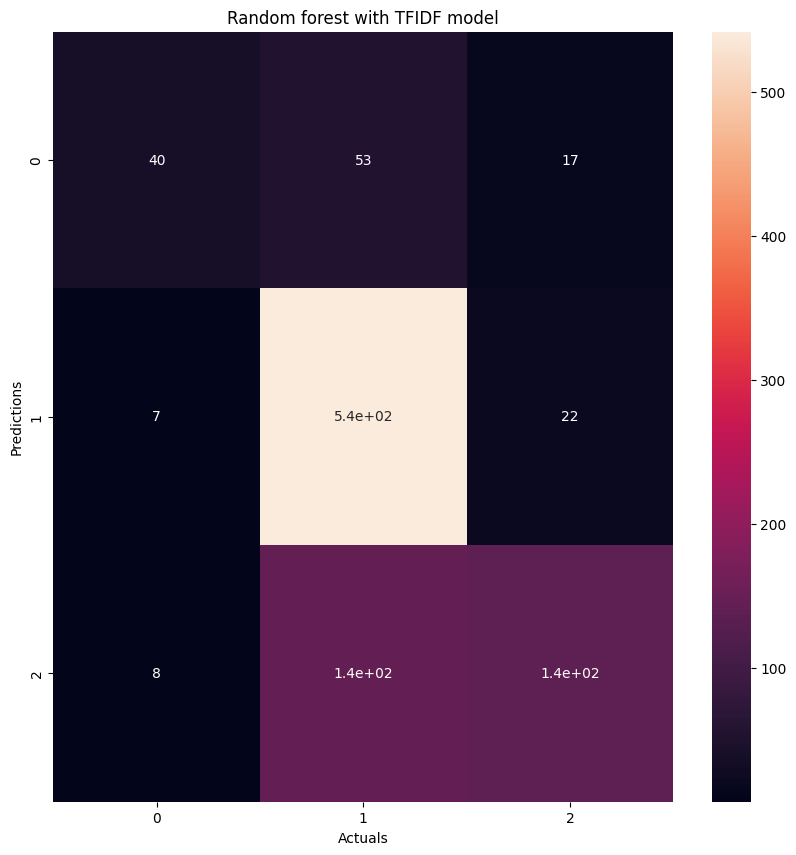

In [67]:
mat = confusion_matrix(y_test, yfit_rf)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("Random forest with TFIDF model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(95.72222222222221, 0.5, 'Predictions')

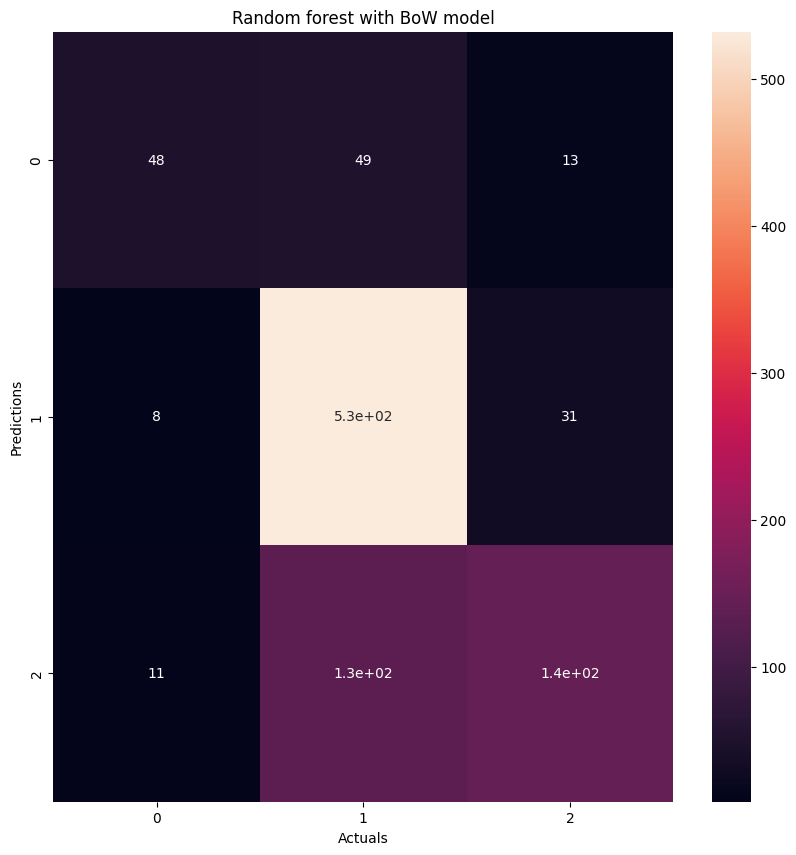

In [65]:
mat = confusion_matrix(y_test_BoW, yfit_rf_BoW)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("Random forest with BoW model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(95.72222222222221, 0.5, 'Predictions')

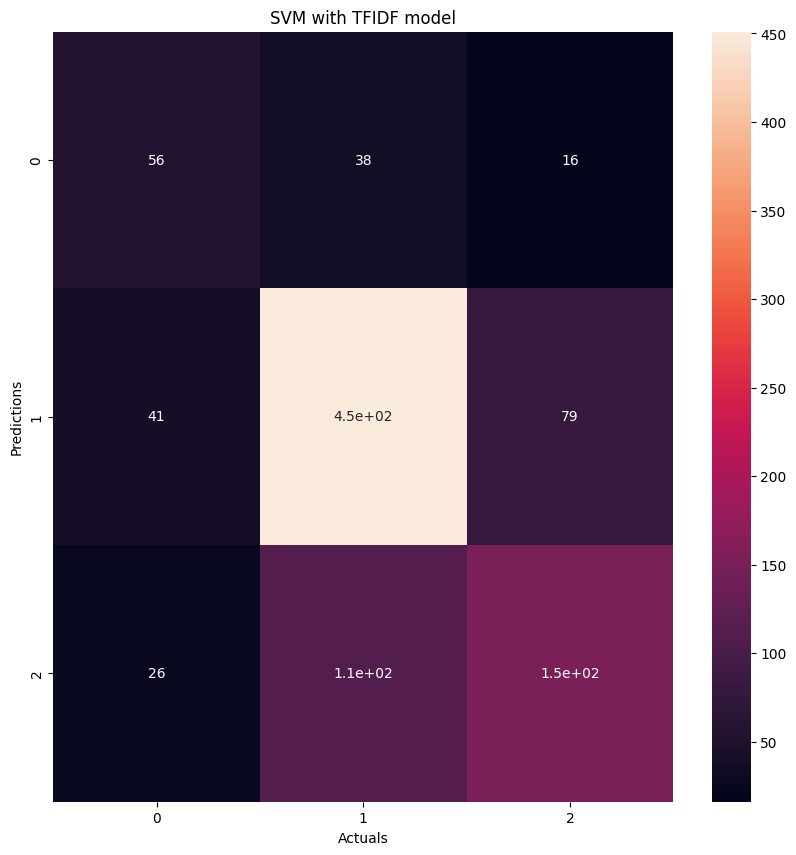

In [66]:
mat = confusion_matrix(y_test, yfit_svc)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("SVM with TFIDF model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(95.72222222222221, 0.5, 'Predictions')

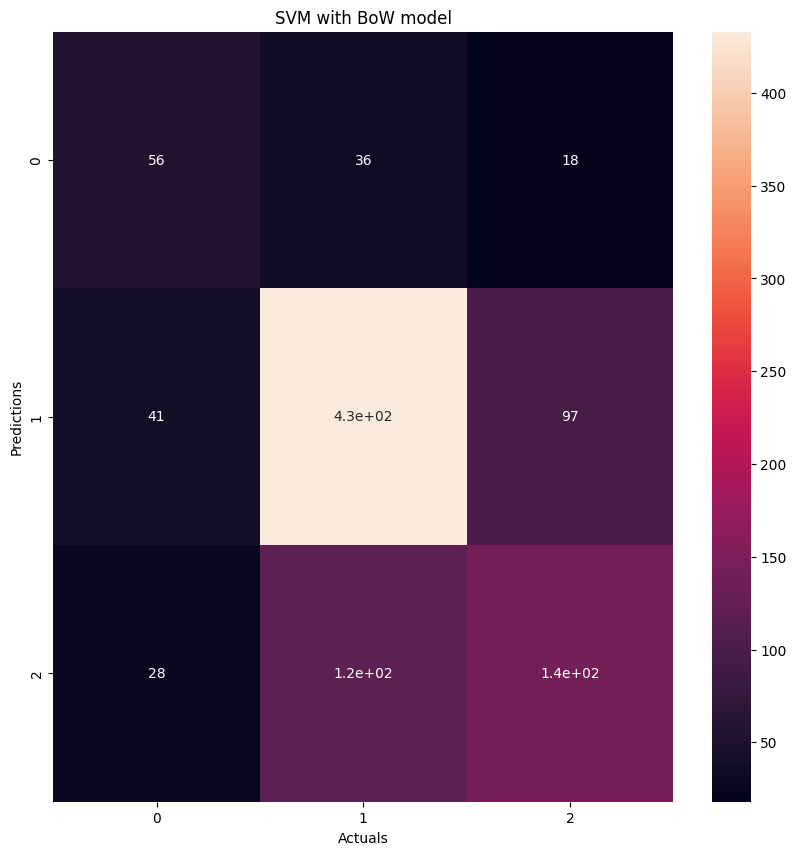

In [68]:
mat = confusion_matrix(y_test_BoW, yfit_svc_BoW)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("SVM with BoW model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")